# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Luis Alejandro Rodríguez González

- ID: A01637333

- Major: Computer Science and Technology (ITC)

# Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# A1 Load data

In [2]:
path = "datasets/evidencia/A01637333.csv"
df = pd.read_csv(path)

# A2 Data managment


Print the first 7 rows

In [3]:
df.head(7)

,Unnamed: 0,x1,x2,x3,x4,x5
0,0,-10.530705,0.300204,-3.388305,2.818733,-0.518819
1,1,-5.260626,-0.777347,2.456504,8.535144,5.664871
2,2,-11.164205,-0.074193,-5.266379,-0.235742,-3.269158
3,3,1.095870,-1.102131,2.594271,7.323310,3.076989
4,4,-3.088308,4.066238,-3.625392,-9.147583,5.147980
5,5,-4.483950,-6.166882,1.785841,8.805158,5.276865
6,6,-2.236579,2.750317,-5.184823,-10.961243,3.095229


Print the first 4 last rows

In [4]:
df.tail(4)

,Unnamed: 0,x1,x2,x3,x4,x5
329,329,-3.522744,5.669223,-5.089627,-10.552508,6.808788
330,330,-2.921292,-1.831122,4.569517,6.934522,4.751245
331,331,-3.826968,-4.122059,5.568203,7.762774,2.923397
332,332,-5.077258,-1.923832,3.299423,6.245520,4.137215


How many rows and columns are in your data?

Use the `shape` method


In [5]:
df.shape

(333, 6)

Print the name of all columns 

Use the `columns` method

In [6]:
for i in df.columns:
    print(i)

Unnamed: 0
x1
x2
x3
x4
x5


What is the data type in each column

Use the `dtypes` method 

In [7]:
df.dtypes

Unnamed: 0      int64
x1            float64
x2            float64
x3            float64
x4            float64
x5            float64
dtype: object

What is the meaning of rows and columns?

- **Rows:** Observations

- **Columns:**

    - Unnamed 0: Observation index

    - x1, x2, x3, x4, x5: Numeric variables

Print a statistical summary of your columns


In [8]:
summary = df.describe()
summary

,Unnamed: 0,x1,x2,x3,x4,x5
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,166.000000,-5.149802,0.793046,-0.721968,-0.173867,2.915390
std,96.273049,3.191272,2.883207,3.238124,7.273468,2.842126
min,0.000000,-13.646829,-7.519549,-6.079867,-14.452194,-4.189944
25%,83.000000,-8.173679,-1.583812,-3.407916,-8.933964,0.481400
50%,166.000000,-4.093402,1.263078,-1.499154,2.339896,3.484842
75%,249.000000,-2.662001,3.020767,2.456504,5.893749,5.045285
max,332.000000,1.095870,6.438375,5.953420,10.254653,9.301031


In [9]:
# 1) What are each variable's minumum and maximum values
for i in ["min","max"]:
    for j in summary.columns:
        print(i, "(", j, ") = ", "{:.2f}".format(summary.loc[i,j]), sep="")
        
# 2) What are each variable's mean and standard deviation
for i in ["mean","std"]:
    for j in summary.columns:
        print(i, "(", j, ") = ", "{:.2f}".format(summary.loc[i,j]), sep="")

# 3) What do the 25%, 50% and 75% represent?
    # These values define the quartiles (quarters of ascendingly ordered values) of each column.
    # That means that all values prior to 25% belong to the lowest quarter.
    # All after that and until 50% belong to the second quarter.
    # Likewise, those after and until 75% belong to the third quarter.
    # Finally, those after belong to the highest quarter.



min(Unnamed: 0) = 0.00
min(x1) = -13.65
min(x2) = -7.52
min(x3) = -6.08
min(x4) = -14.45
min(x5) = -4.19
max(Unnamed: 0) = 332.00
max(x1) = 1.10
max(x2) = 6.44
max(x3) = 5.95
max(x4) = 10.25
max(x5) = 9.30
mean(Unnamed: 0) = 166.00
mean(x1) = -5.15
mean(x2) = 0.79
mean(x3) = -0.72
mean(x4) = -0.17
mean(x5) = 2.92
std(Unnamed: 0) = 96.27
std(x1) = 3.19
std(x2) = 2.88
std(x3) = 3.24
std(x4) = 7.27
std(x5) = 2.84


Rename the columns using the same name with capital letters

In [10]:
df = df.rename(columns={i: i.upper() for i in df.columns})
df

,UNNAMED: 0,X1,X2,X3,X4,X5
0,0,-10.530705,0.300204,-3.388305,2.818733,-0.518819
1,1,-5.260626,-0.777347,2.456504,8.535144,5.664871
2,2,-11.164205,-0.074193,-5.266379,-0.235742,-3.269158
3,3,1.095870,-1.102131,2.594271,7.323310,3.076989
4,4,-3.088308,4.066238,-3.625392,-9.147583,5.147980
...,...,...,...,...,...,...
328,328,-4.546540,0.991701,-3.358166,-9.492977,2.319584
329,329,-3.522744,5.669223,-5.089627,-10.552508,6.808788
330,330,-2.921292,-1.831122,4.569517,6.934522,4.751245
331,331,-3.826968,-4.122059,5.568203,7.762774,2.923397


Rename the columns to their original names

In [11]:
df = df.rename(columns={i: i.lower() for i in df.columns})
df

,unnamed: 0,x1,x2,x3,x4,x5
0,0,-10.530705,0.300204,-3.388305,2.818733,-0.518819
1,1,-5.260626,-0.777347,2.456504,8.535144,5.664871
2,2,-11.164205,-0.074193,-5.266379,-0.235742,-3.269158
3,3,1.095870,-1.102131,2.594271,7.323310,3.076989
4,4,-3.088308,4.066238,-3.625392,-9.147583,5.147980
...,...,...,...,...,...,...
328,328,-4.546540,0.991701,-3.358166,-9.492977,2.319584
329,329,-3.522744,5.669223,-5.089627,-10.552508,6.808788
330,330,-2.921292,-1.831122,4.569517,6.934522,4.751245
331,331,-3.826968,-4.122059,5.568203,7.762774,2.923397


Use two different alternatives to get one of the columns

In [12]:
col1 = df.x1
col2 = df["x1"]
print(col1, "\n\n", col2)

0     -10.530705
1      -5.260626
2     -11.164205
3       1.095870
4      -3.088308
         ...    
328    -4.546540
329    -3.522744
330    -2.921292
331    -3.826968
332    -5.077258
Name: x1, Length: 333, dtype: float64 

 0     -10.530705
1      -5.260626
2     -11.164205
3       1.095870
4      -3.088308
         ...    
328    -4.546540
329    -3.522744
330    -2.921292
331    -3.826968
332    -5.077258
Name: x1, Length: 333, dtype: float64


Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [13]:
sub1 = df.iloc[62:73, 1:3]
sub1

,x1,x2
62,-5.899112,2.481162
63,-3.278263,3.907402
64,-2.100055,4.145850
65,-0.787314,3.733124
66,-3.716099,3.611458
67,-0.349389,-3.045223
68,-10.625544,1.351138
69,0.282722,3.020767
70,-2.782346,-7.519549
71,-1.029138,3.806288


For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [14]:
null1 = df.iloc[:,1].isnull().sum()
notnull1 = df.iloc[:,1].notnull().sum()
print(null1, "+", notnull1, "=", df.shape[0])

0 + 333 = 333


In [15]:
null2 = df.iloc[:,2].isnull().sum()
notnull2 = df.iloc[:,2].notnull().sum()
print(null2, "+", notnull2, "=", df.shape[0])

0 + 333 = 333


Discard the last column


In [16]:
df.drop(df.columns[0], axis=1, inplace=True)

In [17]:
df.head()

,x1,x2,x3,x4,x5
0,-10.530705,0.300204,-3.388305,2.818733,-0.518819
1,-5.260626,-0.777347,2.456504,8.535144,5.664871
2,-11.164205,-0.074193,-5.266379,-0.235742,-3.269158
3,1.095870,-1.102131,2.594271,7.323310,3.076989
4,-3.088308,4.066238,-3.625392,-9.147583,5.147980


### Questions 

Based on the previos results, provide a description of yout dataset

Your response: The dataset consists of 5 floating point variables (after dropping one of integer indices) and 333 rows of observations. Values range between -14.45 and 10.25 (inclusive).


# A3 Data visualization

Plot in the same figure the histogram of the two variables

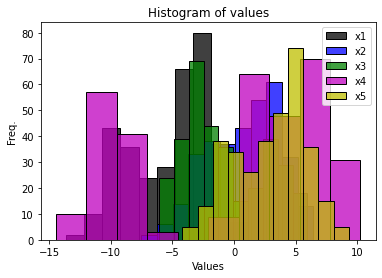

In [18]:
colors = ["k", "b", "g", "m", "y"]
for i in range(0,df.shape[1]):
    hstplt = sns.histplot(df[df.columns[i]], color=colors[i])
hstplt.set_title("Histogram of values")
hstplt.set_xlabel("Values")
hstplt.set_ylabel("Freq.")
hstplt.legend(df.columns)
plt.show()

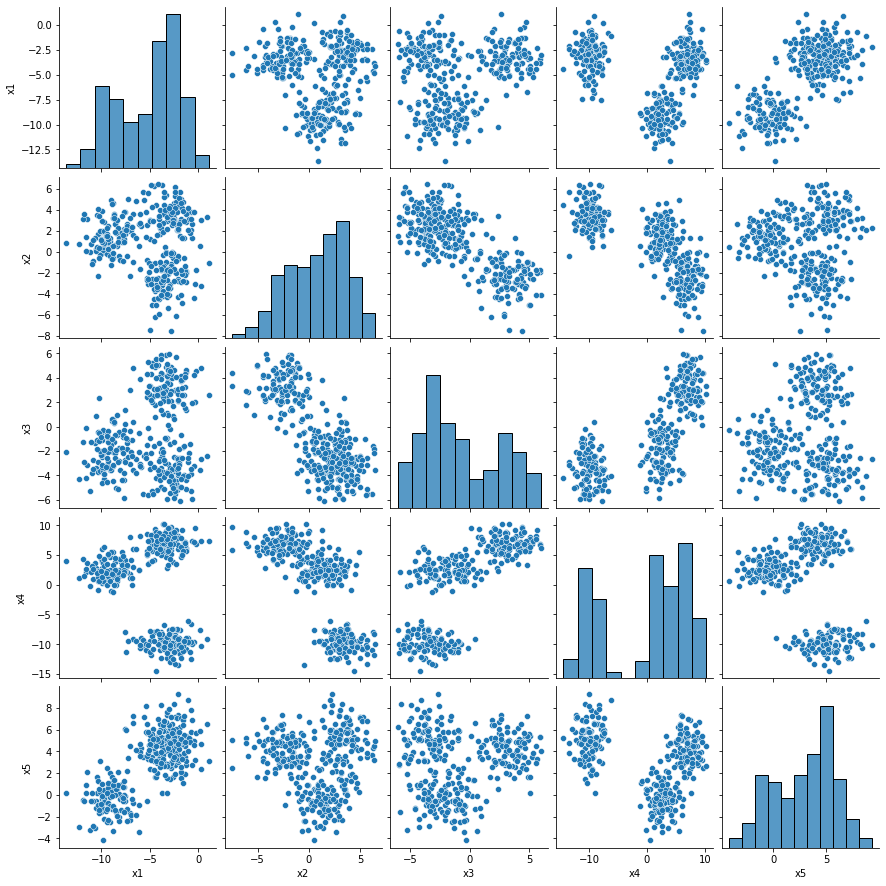

In [19]:
sns.pairplot(df)
plt.show()

Based on these plots, provide a description of your data:

Your response here: All variables display a multimodal shape. All histograms appear to have more than one peak. Furthermore, the pair plots show 3 possible clusters into which the observations could be separated.

Plot in the same figure the boxplot of the two variables 

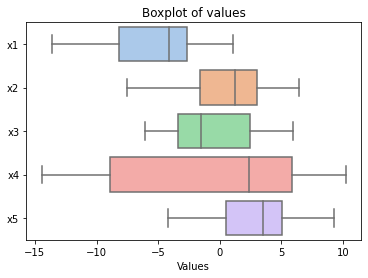

In [20]:
bxplt = sns.boxplot(data=df, orient="h", palette="pastel")
bxplt.set_title("Boxplot of values")
bxplt.set_xlabel("Values")
plt.show()

Scatter plot of the two variables

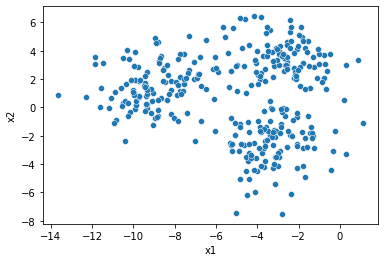

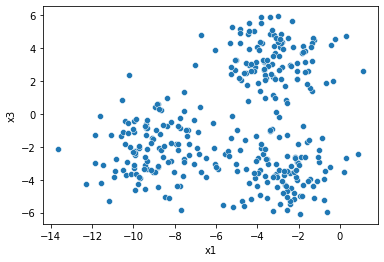

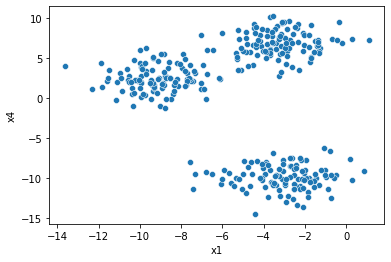

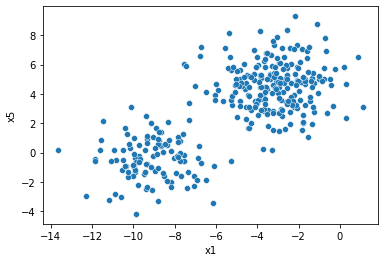

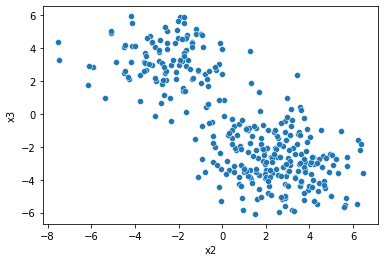

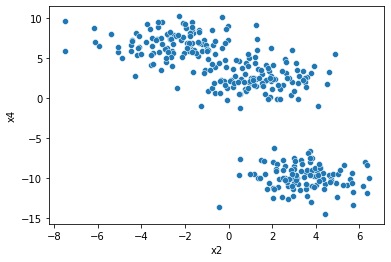

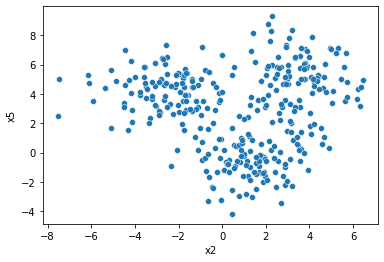

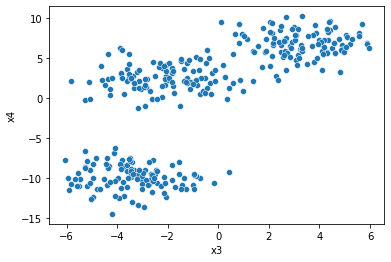

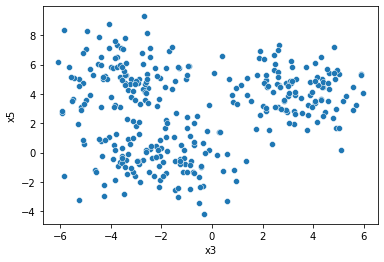

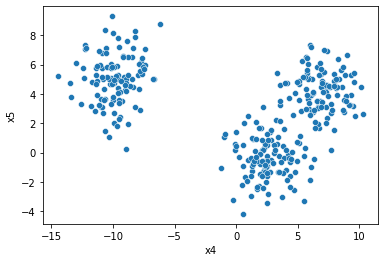

In [21]:
for i in range(0, df.shape[1]):
    for j in range(0, df.shape[1]):
        i_name = df.columns[i]
        j_name = df.columns[j]
        if i<j:
            sns.scatterplot(data=df, x=i_name, y=j_name)
            plt.show()

### Questions 

Based on the previous plots, provide a description of your dataset.

Your response: The boxplots display value ranges that would indicate the data are skewed but then with the scatter plot it becomes apparent that they are actually observations from separate clusters.

# A4 Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plot

In [22]:
# Number of clusters
km = KMeans(n_clusters=3)

# Clustering
yp = km.fit_predict(df)

# Print estimated clusters
yp

array([2, 1, 2, 1, 0, 1, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 2, 2, 0, 0, 1, 2,
       2, 1, 1, 0, 1, 2, 0, 2, 1, 1, 2, 0, 0, 0, 2, 0, 2, 0, 2, 1, 0, 1,
       1, 0, 1, 2, 1, 2, 1, 2, 2, 1, 2, 0, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0,
       0, 1, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2, 1, 1, 0, 2, 2, 2, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 2, 1, 2, 2, 0, 0, 0, 2, 2, 1, 2, 1, 0, 2, 0, 1, 0,
       1, 1, 1, 2, 2, 1, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 1,
       1, 2, 1, 0, 2, 2, 2, 1, 0, 1, 1, 0, 1, 2, 0, 1, 2, 0, 1, 1, 1, 0,
       2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 0, 2, 1, 2, 2, 1,
       2, 0, 0, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 0, 1, 2, 1, 1, 1, 2,
       0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 0, 1, 0, 2, 0, 0, 0, 0, 2, 2, 1,
       2, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 1, 1, 1, 1, 1, 0,
       2, 2, 1, 2, 0, 2, 0, 1, 1, 0, 0, 0, 1, 2, 0, 2, 2, 0, 2, 1, 2, 2,
       1, 1, 0, 2, 2, 2, 1, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 2, 2, 2, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 2,

Add to your dataset a column with the assigned cluster to each data point

In [23]:
df["cluster"] = yp

Print the number associated to each cluster

In [24]:
df.cluster.unique()

array([2, 1, 0], dtype=int32)

Print the centroids

In [25]:
cc = km.cluster_centers_
cc

array([[-3.07940953,  3.45755499, -3.37853542, -9.88256636,  5.03043535],
       [-3.24854225, -2.5126583 ,  3.30338615,  6.85808079,  4.1771144 ],
       [-9.12145388,  1.43424071, -2.09075459,  2.50288393, -0.46138091]])

Print the intertia metric

In [26]:
km.inertia_

3717.6095570255893

Plot a scatter plot of your data assigned to each cluster. Also plot the centroids

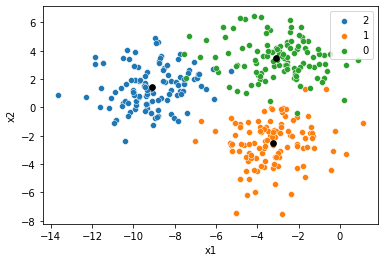

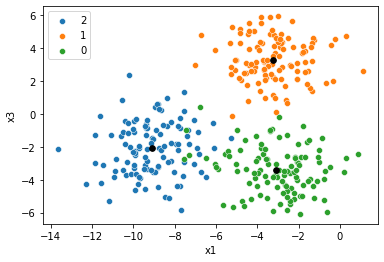

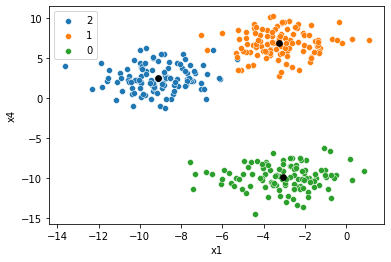

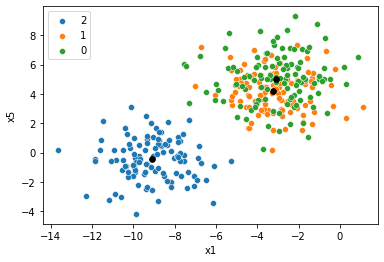

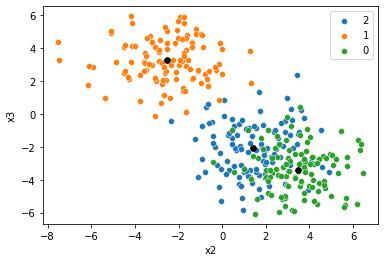

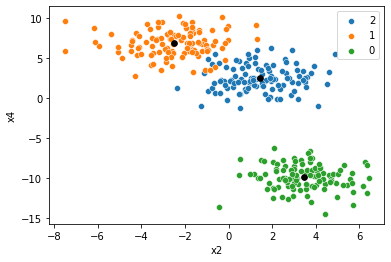

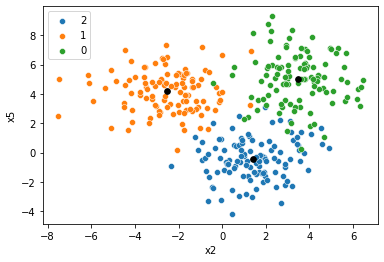

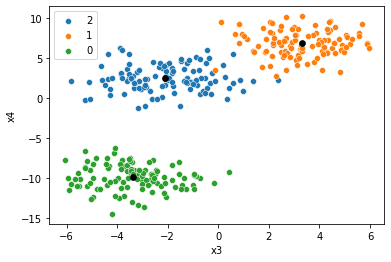

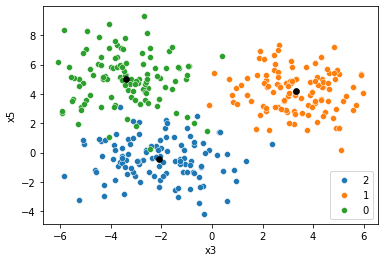

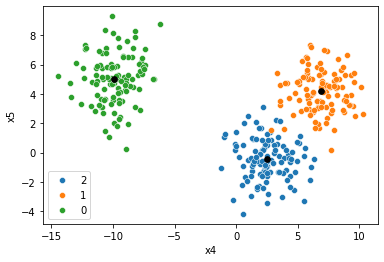

In [27]:
for i in range(0, df.shape[1]):
    for j in range(0, df.shape[1]):
        i_name = df.columns[i]
        j_name = df.columns[j]
        if i<j and i_name!="cluster" and j_name!="cluster":
            for k in df.cluster.unique():
                cltplt = sns.scatterplot(data=df[df.cluster==k], x=i_name, y=j_name, label=k)
                plt.scatter(cc[k,i], cc[k,j], marker=".", s=128, color="k")
            plt.show()

### Questions 

Provides a detailed description of your results

Your response: The data have been separated into 3 clusters and the observations only ever overlap in 2 of the 10 plots. Therefore, it can be said that 3 clusters was a right assumption.

# A4 Elbow plot

Compute the Elbow plot

In [28]:
sse = []
rng = range(1, 10)
for i in rng:
    km_elbow = KMeans(n_clusters=i)
    km_elbow.fit_predict(df)
    sse.append(km_elbow.inertia_)

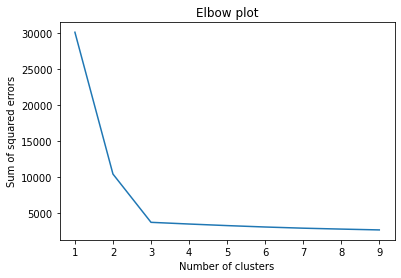

In [29]:
plt.plot(rng, sse)
plt.title("Elbow plot")
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squared errors")
plt.show()

### Questions 

What is the best number of clusters K? (argue your response)

Your response: The best number of clusters is 3, as it can be seen that the sum of squared errors doesn't decrease by more than 10% after that, while it decreased by almost a factor of 3 from the iteration with 2 clusters.


Does this number of clusters agree with your inital guess? (argue your response)

Your response: Yes. It was very evident from the initial plots that the data were to be separated into 3 clusters and the elbow plot proved that.

# BONUS

1) Generate some data using the "make_blobs" function from "sklearn.datasets"

- The number of observations is equal to the three last digits in your ID

- 2 variables

- 4 clusters

- Standard deviation of each cluster of 1.5



In [30]:
Xb, yb, cb = make_blobs(n_samples=333, n_features=2, centers=4, cluster_std=1.5, random_state=211029, return_centers=True)

2) Plot the scatter plot of your data using the real cluster labels

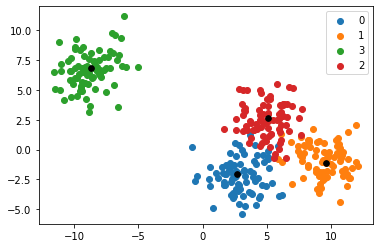

In [31]:
for k in pd.array(yb).unique():
    plt.scatter(Xb[yb==k, 0], Xb[yb==k, 1], label=k)
    plt.scatter(cb[k,0], cb[k,1], marker=".", s=128, color="k")
plt.legend()
plt.show()

3) Do K means clustering 

In [32]:
# Number of clusters
kmb = KMeans(n_clusters=4)

# Clustering
ypb = kmb.fit_predict(Xb)
cpb = kmb.cluster_centers_
cpb

# Print estimated cluster of each point in the dataset
ypb

array([1, 1, 0, 2, 0, 3, 0, 1, 1, 0, 3, 2, 0, 2, 2, 1, 2, 3, 2, 2, 0, 2,
       0, 1, 2, 1, 1, 3, 0, 0, 1, 2, 3, 3, 3, 1, 0, 2, 2, 2, 3, 2, 0, 0,
       3, 1, 2, 0, 2, 3, 0, 1, 2, 3, 0, 2, 2, 3, 3, 3, 2, 0, 3, 2, 2, 1,
       2, 1, 3, 3, 2, 2, 2, 1, 3, 2, 2, 2, 0, 3, 3, 1, 0, 1, 1, 0, 3, 1,
       0, 2, 1, 0, 3, 0, 3, 0, 1, 3, 2, 0, 3, 2, 1, 1, 3, 0, 2, 0, 1, 1,
       2, 0, 3, 2, 0, 3, 1, 1, 2, 3, 1, 2, 3, 0, 1, 2, 2, 3, 3, 0, 0, 3,
       1, 0, 3, 3, 1, 1, 3, 0, 0, 1, 3, 3, 2, 2, 1, 0, 0, 0, 3, 0, 1, 1,
       1, 2, 2, 0, 3, 0, 2, 3, 0, 3, 2, 3, 2, 0, 1, 1, 3, 2, 1, 3, 0, 3,
       2, 3, 3, 1, 1, 2, 3, 0, 0, 2, 2, 1, 3, 0, 3, 1, 0, 3, 1, 3, 1, 3,
       0, 0, 2, 3, 3, 0, 3, 3, 0, 0, 0, 2, 3, 2, 3, 1, 0, 2, 2, 2, 2, 2,
       0, 0, 1, 0, 0, 0, 2, 2, 0, 1, 2, 2, 3, 2, 0, 3, 3, 1, 1, 2, 2, 1,
       2, 2, 3, 1, 3, 0, 3, 2, 1, 0, 1, 2, 2, 1, 0, 3, 3, 1, 2, 1, 2, 2,
       3, 0, 3, 1, 2, 1, 0, 2, 3, 3, 3, 1, 1, 1, 1, 1, 3, 0, 3, 0, 1, 0,
       1, 0, 2, 0, 1, 3, 1, 3, 1, 0, 0, 0, 3, 3, 0,

4) Plot the scatter plot of your data using the estimated cluster labels

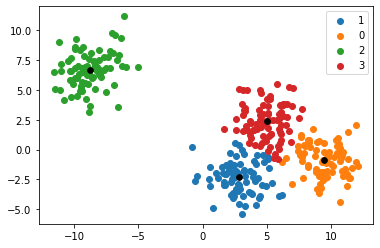

In [33]:
for k in pd.array(ypb).unique():
    plt.scatter(Xb[ypb==k, 0], Xb[ypb==k, 1], label=k)
    plt.scatter(cpb[k,0], cpb[k,1], marker=".", s=128, color="k")
plt.legend()
plt.show()

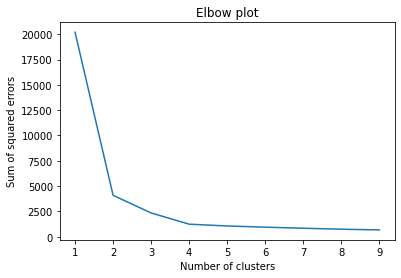

In [36]:
sseb = []
rngb = range(1, 10)
for i in rngb:
    kmb_elbow = KMeans(n_clusters=i)
    kmb_elbow.fit_predict(Xb)
    sseb.append(kmb_elbow.inertia_)
plt.plot(rngb, sseb)
plt.title("Elbow plot")
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squared errors")
plt.show()

### Questions 

Provides a detailed description of your results.

Your response: In this particular iteration, where I used today's date in the YYMMDD format as the seed, the algorithm was good at classifying the data. However, it does not perform well when data from different clusters overlap in all dimensions, as it assigns them to the nearest center, rather than the correct one which may lie further. The elbow plot proves 4 clusters is the right choice, as the sum of squared errors decreases almost by a factor of 2 from the previous iteration and then decreases by no more than 10% in the next one.

# Descipcion de tu percepcion del nivel de desarrollo de la subcompetencia 

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta: Considero que en esta semana Tec desarrollé esta subcompetencia, pues pude desarrollar un entendimiento de las interacciones de variables en múltiples dimensiones que no pueden ser representadas visualmente en el mundo tridimensional.

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta: Considero que desarrollé esta subcompetencia mediante el uso de la librería scikit-learn, analizando las variables en las dimensiones necesarias para crear un modelo predictivo.